In [2]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta
from itertools import compress


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
d = datetime(5,12,26);
print d.date

ms = gps_particle_data.meta_search();

e = gps_particle_data.event("Boxing Day Earthquake");
e.add_date(mins=59,hh=00,dd=26,mm=12,yy=05);
e.add_data("Geographic_Latitude",3.24);
e.add_data("Geographic_Longitude",95.8);

start_date = datetime(5,12,18);
end_date = datetime(6,1,8);

ms.load_data(start_date,end_date);
ms.apply_search(e, 7);
# ms.extend_time_window(0.25);

output_data = ms.get_selected_data("decimal_day");

#for fn in output_data.keys():
#    print;#
#    print;
#    print fn;
#    for ikey in output_data[fn].keys():
#       print ikey;
#       print output_data[fn][ikey][0];
#       print output_data[fn][ikey][-1];

<built-in method date of datetime.datetime object at 0x7f69bc851d28>
File ns41_051218_v1.03.ascii already exists 

Reading file ns41_051218_v1.03.ascii

Min Latitude         :  -56.4122
Max Latitude         :  56.4141
Min Longitude         :  -178.7851
Max Longitude         :  179.3252
Min Radius         :  4.158707
Max Radius         :  4.178541
Min L Shell         :  4.12851
Max L Shell        :  25.0
Min Day            :  352.000683
Max Day            :  358.997905
Year             :  2005.0

File ns41_051225_v1.03.ascii already exists 

Reading file ns41_051225_v1.03.ascii

Min Latitude         :  -56.4134
Max Latitude         :  56.4146
Min Longitude         :  -179.9223
Max Longitude         :  179.9701
Min Radius         :  4.15869
Max Radius         :  4.178548
Min L Shell         :  4.138678
Max L Shell        :  25.0
Min Day            :  359.000683
Max Day            :  365.997894
Year             :  2005.0

File ns41_060101_v1.03.ascii already exists 

Reading file ns41_060


Reading file ns59_051225_v1.03.ascii

Min Latitude         :  -54.9023
Max Latitude         :  54.9032
Min Longitude         :  -179.3827
Max Longitude         :  179.4654
Min Radius         :  4.155855
Max Radius         :  4.18194
Min L Shell         :  4.121816
Max L Shell        :  999.0
Min Day            :  359.000544
Max Day            :  365.997755
Year             :  2005.0

File ns59_060101_v1.03.ascii already exists 

Reading file ns59_060101_v1.03.ascii

Min Latitude         :  -54.8923
Max Latitude         :  54.8937
Min Longitude         :  -179.4906
Max Longitude         :  179.3456
Min Radius         :  4.155883
Max Radius         :  4.181897
Min L Shell         :  4.127514
Max L Shell        :  999.0
Min Day            :  1.000532
Max Day            :  7.997755
Year             :  2006.0

File ns59_060108_v1.03.ascii already exists 

Reading file ns59_060108_v1.03.ascii

Min Latitude         :  -54.8898
Max Latitude         :  54.8913
Min Longitude         :  -179.621

/home/filip/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/filip/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/filip/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/filip/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/filip/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.ho

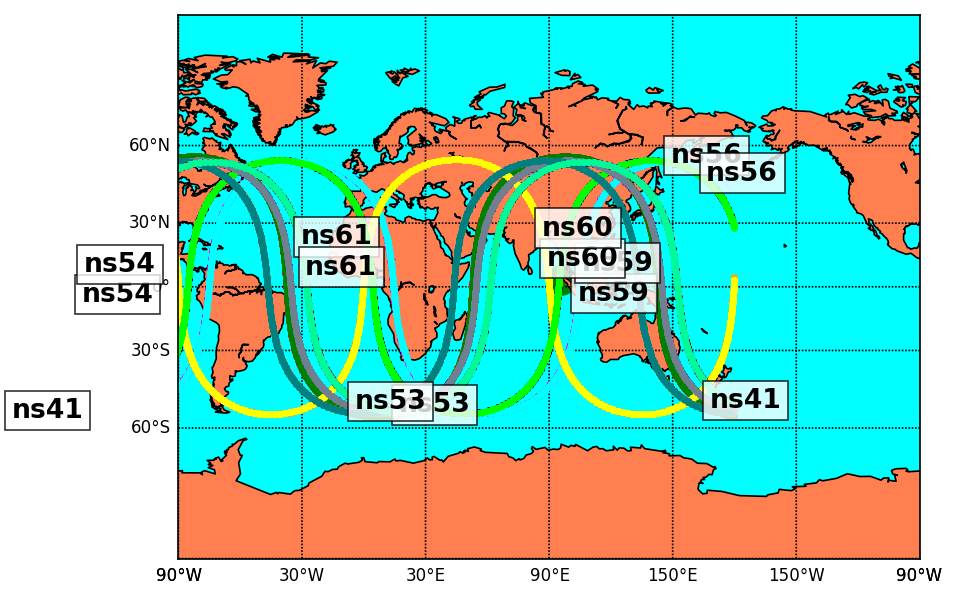

In [4]:
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from datetime import datetime

# miller projection
map = Basemap(projection='mill',lon_0=90)
plt.figure(figsize=(8, 6), dpi=120);
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
# CS=map.nightshade(date)

# Plot the Earthquake event on the map
lon = e.data["Geographic_Longitude"];
lat = e.data["Geographic_Latitude"];
x,y = map(lon,lat);
map.scatter(x,y,s=300,marker='o',color='g',alpha=1);
map.scatter(x,y,s=16,marker='o',color='r',alpha=1);

# Plot the projection of the satellite
#print len(output_data[fn]["Geographic_Longitude"])
#return
i = 0
colour = ['red', 'blue', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen', 'red']
for fn in output_data.keys():
    
    sat_lon = output_data[fn]["Geographic_Longitude"];
    sat_lat = output_data[fn]["Geographic_Latitude"];
    xs,ys = map(sat_lon,sat_lat);
    plt.text(xs[10], ys[10],fn[0:4] , fontsize=16, fontweight='bold',bbox=dict(facecolor='w', alpha=0.8));
    #map.plot(xs,ys,marker='o',color='g',markersize=15);
    map.plot(xs,ys,marker='o',color= colour[i],markersize=3,linewidth=0);
    #map.scatter(xs,ys,s=16,marker='o',color='b');
    i+=1

# plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

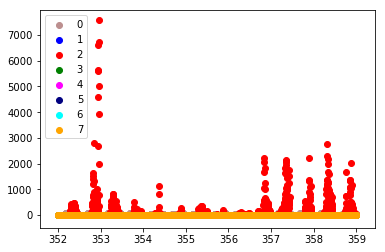

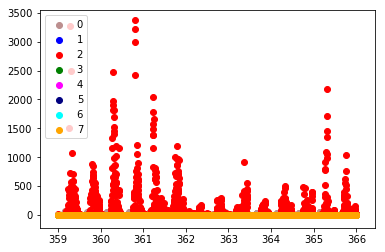

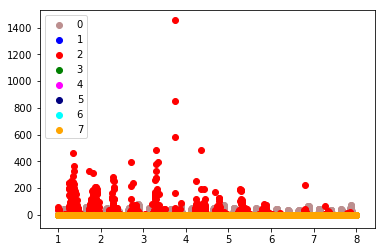

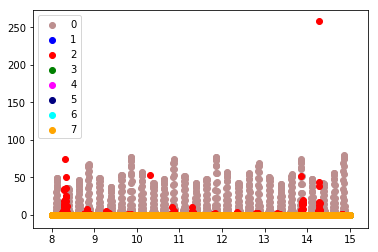

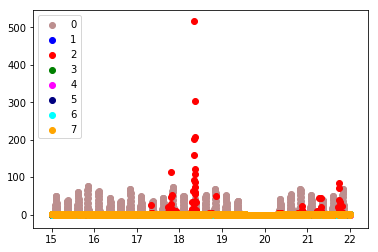

In [5]:
data_index = 0;
signal = "rate_proton_measured";
sat_no = 'ns41'
fig = plt.figure(figsize=(8, 6), dpi=120)
for date in ['051218', '051225', '060101', '060108', '060115']:
    filename = sat_no + '_' + date +'_' + 'v1.03.ascii'
    
    log = open(filename, 'r');
    reading = log.readlines()[5:];
    new_name = filename[53:]
    json_filename = 'head.json'
    header = open(json_filename, "w+")
    for line in reading:
        if line.startswith('#'):
            li = line.strip('#')
            header.write(li)
    header.close()
    
    # Open up the json file	
    head = json.load(open(json_filename)); #load header file
    f = np.loadtxt(filename); #use numpy library to create arrays
    variables = {}
    for x, value in head.items():
        i = value['START_COLUMN']
        j = i + value['DIMENSION'][0]
        variables.update({x: f[ : , i : j] for column in head});
    # Chop up array into columns to plot (not as neat as Chris's method but does the job...)
    split_columns = {}
    i = 0
    var = variables[signal]
    dim = head[signal]['DIMENSION'][0]
    for col in range(dim):
        split_columns.update({col: var[ : , i : i+1]})
        i += 1
   
    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = variables["decimal_day"]
    
    for j in range(dim):
        ax.scatter(x, split_columns[j], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left')
        
plt.show()

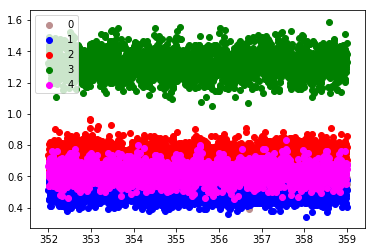

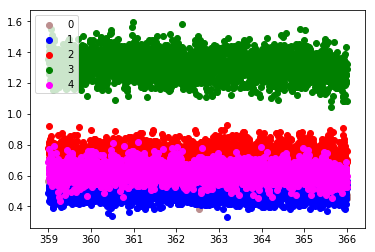

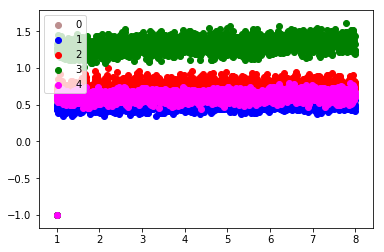

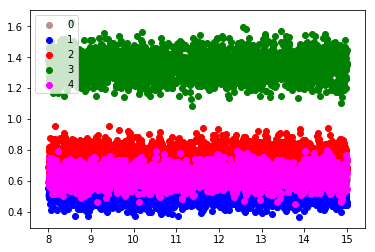

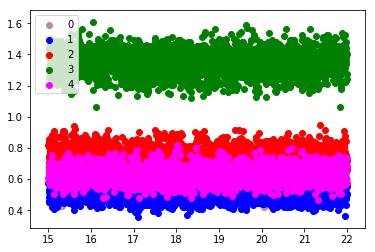

In [6]:
data_index = 0;
signal = "rate_proton_measured";
sat_no = 'ns53'
fig = plt.figure(figsize=(8, 6), dpi=120)
for date in ['051218', '051225', '060101', '060108', '060115']:
    filename = sat_no + '_' + date +'_' + 'v1.03.ascii'
    
    log = open(filename, 'r');
    reading = log.readlines()[5:];
    new_name = filename[53:]
    json_filename = 'head.json'
    header = open(json_filename, "w+")
    for line in reading:
        if line.startswith('#'):
            li = line.strip('#')
            header.write(li)
    header.close()
    
    # Open up the json file	
    head = json.load(open(json_filename)); #load header file
    f = np.loadtxt(filename); #use numpy library to create arrays
    variables = {}
    for x, value in head.items():
        i = value['START_COLUMN']
        j = i + value['DIMENSION'][0]
        variables.update({x: f[ : , i : j] for column in head});
    # Chop up array into columns to plot (not as neat as Chris's method but does the job...)
    split_columns = {}
    i = 0
    var = variables[signal]
    dim = head[signal]['DIMENSION'][0]
    for col in range(dim):
        split_columns.update({col: var[ : , i : i+1]})
        i += 1
   
    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = variables["decimal_day"]
    
    for j in range(dim):
        ax.scatter(x, split_columns[j], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left')
        
plt.show()

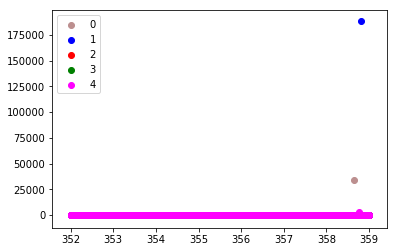

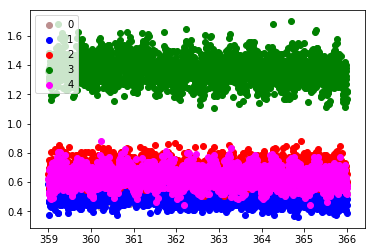

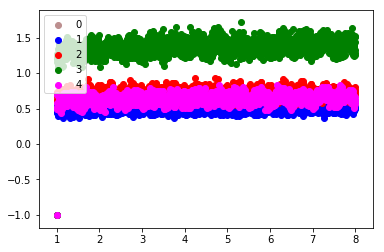

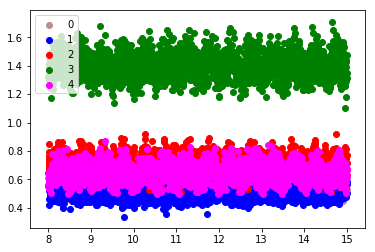

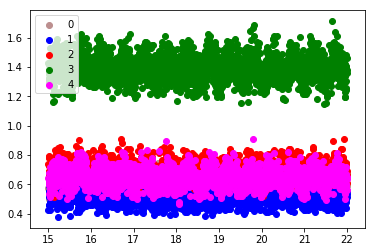

In [7]:
data_index = 0;
signal = "rate_proton_measured";
sat_no = 'ns54'
fig = plt.figure(figsize=(8, 6), dpi=120)
for date in ['051218', '051225', '060101', '060108', '060115']:
    filename = sat_no + '_' + date +'_' + 'v1.03.ascii'
    
    log = open(filename, 'r');
    reading = log.readlines()[5:];
    new_name = filename[53:]
    json_filename = 'head.json'
    header = open(json_filename, "w+")
    for line in reading:
        if line.startswith('#'):
            li = line.strip('#')
            header.write(li)
    header.close()
    
    # Open up the json file	
    head = json.load(open(json_filename)); #load header file
    f = np.loadtxt(filename); #use numpy library to create arrays
    variables = {}
    for x, value in head.items():
        i = value['START_COLUMN']
        j = i + value['DIMENSION'][0]
        variables.update({x: f[ : , i : j] for column in head});
    # Chop up array into columns to plot (not as neat as Chris's method but does the job...)
    split_columns = {}
    i = 0
    var = variables[signal]
    dim = head[signal]['DIMENSION'][0]
    for col in range(dim):
        split_columns.update({col: var[ : , i : i+1]})
        i += 1
   
    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = variables["decimal_day"]
    
    for j in range(dim):
        ax.scatter(x, split_columns[j], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left')
        
plt.show()

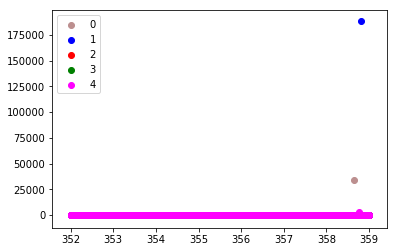

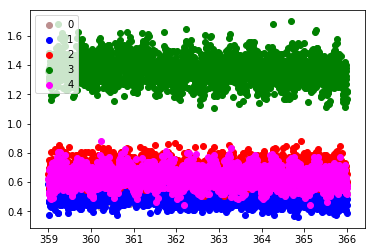

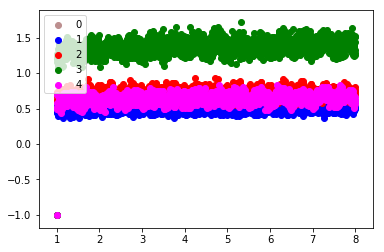

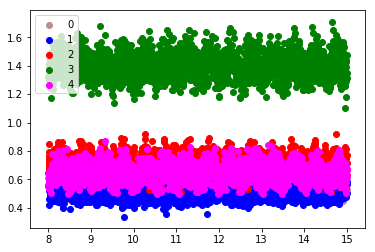

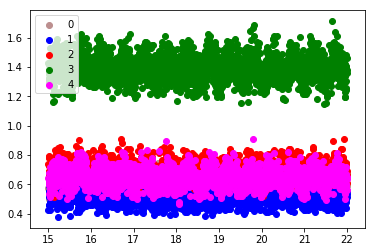

In [8]:
data_index = 0;
signal = "rate_proton_measured";
sat_no = 'ns54'
fig = plt.figure(figsize=(8, 6), dpi=120)
for date in ['051218', '051225', '060101', '060108', '060115']:
    filename = sat_no + '_' + date +'_' + 'v1.03.ascii'
    
    log = open(filename, 'r');
    reading = log.readlines()[5:];
    new_name = filename[53:]
    json_filename = 'head.json'
    header = open(json_filename, "w+")
    for line in reading:
        if line.startswith('#'):
            li = line.strip('#')
            header.write(li)
    header.close()
    
    # Open up the json file	
    head = json.load(open(json_filename)); #load header file
    f = np.loadtxt(filename); #use numpy library to create arrays
    variables = {}
    for x, value in head.items():
        i = value['START_COLUMN']
        j = i + value['DIMENSION'][0]
        variables.update({x: f[ : , i : j] for column in head});
    # Chop up array into columns to plot (not as neat as Chris's method but does the job...)
    split_columns = {}
    i = 0
    var = variables[signal]
    dim = head[signal]['DIMENSION'][0]
    for col in range(dim):
        split_columns.update({col: var[ : , i : i+1]})
        i += 1
   
    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = variables["decimal_day"]
    
    for j in range(dim):
        ax.scatter(x, split_columns[j], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left')
        
plt.show()

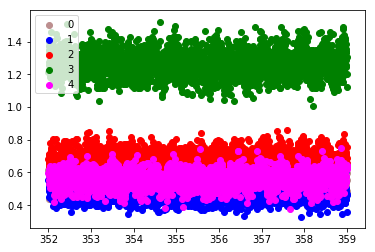

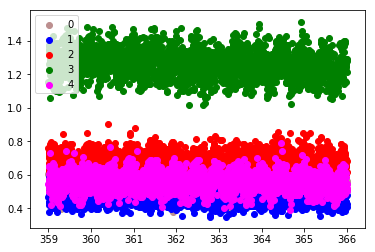

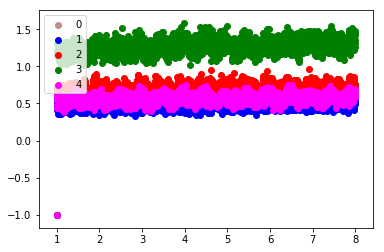

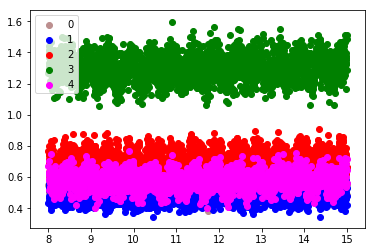

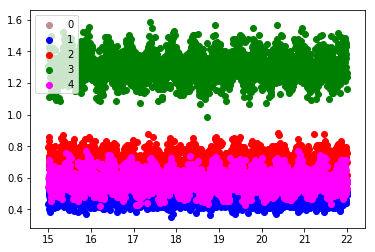

In [9]:
data_index = 0;
signal = "rate_proton_measured";
sat_no = 'ns56'
fig = plt.figure(figsize=(8, 6), dpi=120)
for date in ['051218', '051225', '060101', '060108', '060115']:
    filename = sat_no + '_' + date +'_' + 'v1.03.ascii'
    
    log = open(filename, 'r');
    reading = log.readlines()[5:];
    new_name = filename[53:]
    json_filename = 'head.json'
    header = open(json_filename, "w+")
    for line in reading:
        if line.startswith('#'):
            li = line.strip('#')
            header.write(li)
    header.close()
    
    # Open up the json file	
    head = json.load(open(json_filename)); #load header file
    f = np.loadtxt(filename); #use numpy library to create arrays
    variables = {}
    for x, value in head.items():
        i = value['START_COLUMN']
        j = i + value['DIMENSION'][0]
        variables.update({x: f[ : , i : j] for column in head});
    # Chop up array into columns to plot (not as neat as Chris's method but does the job...)
    split_columns = {}
    i = 0
    var = variables[signal]
    dim = head[signal]['DIMENSION'][0]
    for col in range(dim):
        split_columns.update({col: var[ : , i : i+1]})
        i += 1
   
    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = variables["decimal_day"]
    
    for j in range(dim):
        ax.scatter(x, split_columns[j], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left')
        
plt.show()

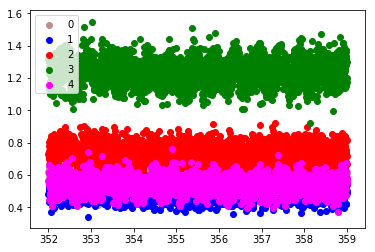

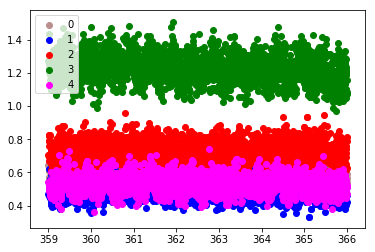

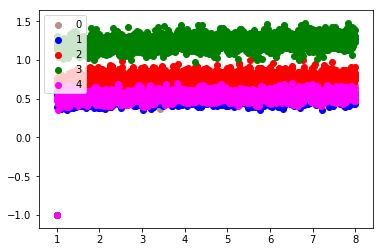

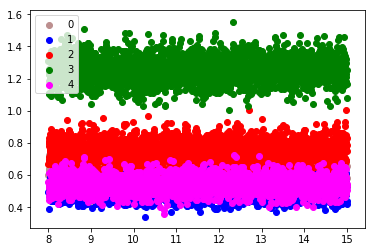

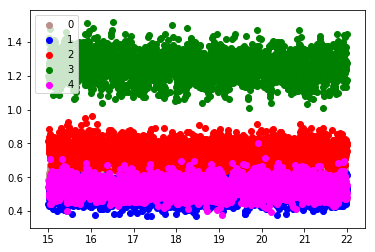

In [10]:
data_index = 0;
signal = "rate_proton_measured";
sat_no = 'ns59'
fig = plt.figure(figsize=(8, 6), dpi=120)
for date in ['051218', '051225', '060101', '060108', '060115']:
    filename = sat_no + '_' + date +'_' + 'v1.03.ascii'
    
    log = open(filename, 'r');
    reading = log.readlines()[5:];
    new_name = filename[53:]
    json_filename = 'head.json'
    header = open(json_filename, "w+")
    for line in reading:
        if line.startswith('#'):
            li = line.strip('#')
            header.write(li)
    header.close()
    
    # Open up the json file	
    head = json.load(open(json_filename)); #load header file
    f = np.loadtxt(filename); #use numpy library to create arrays
    variables = {}
    for x, value in head.items():
        i = value['START_COLUMN']
        j = i + value['DIMENSION'][0]
        variables.update({x: f[ : , i : j] for column in head});
    # Chop up array into columns to plot (not as neat as Chris's method but does the job...)
    split_columns = {}
    i = 0
    var = variables[signal]
    dim = head[signal]['DIMENSION'][0]
    for col in range(dim):
        split_columns.update({col: var[ : , i : i+1]})
        i += 1
   
    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = variables["decimal_day"]
    
    for j in range(dim):
        ax.scatter(x, split_columns[j], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left')
        
plt.show()

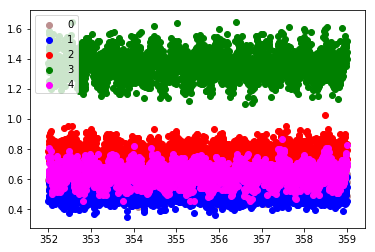

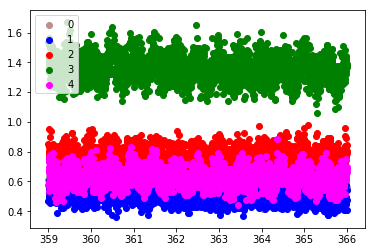

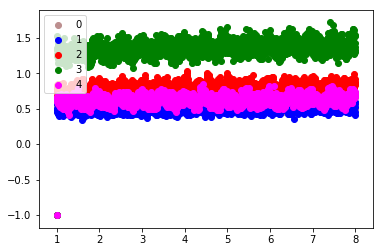

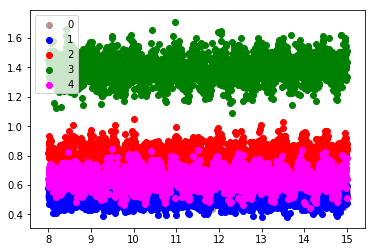

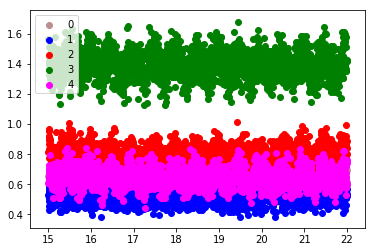

In [11]:
data_index = 0;
signal = "rate_proton_measured";
sat_no = 'ns60'
fig = plt.figure(figsize=(8, 6), dpi=120)
for date in ['051218', '051225', '060101', '060108', '060115']:
    filename = sat_no + '_' + date +'_' + 'v1.03.ascii'
    
    log = open(filename, 'r');
    reading = log.readlines()[5:];
    new_name = filename[53:]
    json_filename = 'head.json'
    header = open(json_filename, "w+")
    for line in reading:
        if line.startswith('#'):
            li = line.strip('#')
            header.write(li)
    header.close()
    
    # Open up the json file	
    head = json.load(open(json_filename)); #load header file
    f = np.loadtxt(filename); #use numpy library to create arrays
    variables = {}
    for x, value in head.items():
        i = value['START_COLUMN']
        j = i + value['DIMENSION'][0]
        variables.update({x: f[ : , i : j] for column in head});
    # Chop up array into columns to plot (not as neat as Chris's method but does the job...)
    split_columns = {}
    i = 0
    var = variables[signal]
    dim = head[signal]['DIMENSION'][0]
    for col in range(dim):
        split_columns.update({col: var[ : , i : i+1]})
        i += 1
   
    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = variables["decimal_day"]
    
    for j in range(dim):
        ax.scatter(x, split_columns[j], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left')
        
plt.show()

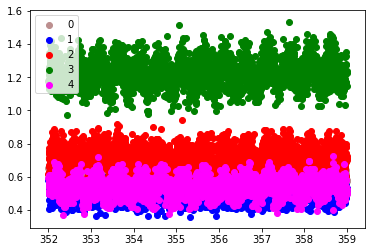

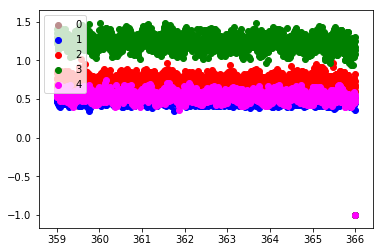

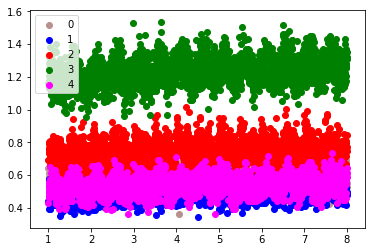

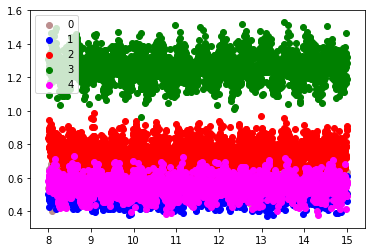

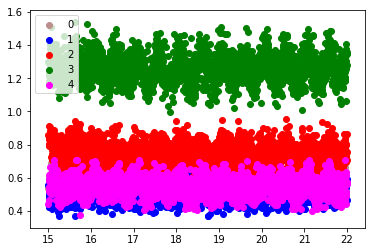

In [12]:
data_index = 0;
signal = "rate_proton_measured";
sat_no = 'ns61'
fig = plt.figure(figsize=(8, 6), dpi=120)
for date in ['051218', '051225', '060101', '060108', '060115']:
    filename = sat_no + '_' + date +'_' + 'v1.03.ascii'
    
    log = open(filename, 'r');
    reading = log.readlines()[5:];
    new_name = filename[53:]
    json_filename = 'head.json'
    header = open(json_filename, "w+")
    for line in reading:
        if line.startswith('#'):
            li = line.strip('#')
            header.write(li)
    header.close()
    
    # Open up the json file	
    head = json.load(open(json_filename)); #load header file
    f = np.loadtxt(filename); #use numpy library to create arrays
    variables = {}
    for x, value in head.items():
        i = value['START_COLUMN']
        j = i + value['DIMENSION'][0]
        variables.update({x: f[ : , i : j] for column in head});
    # Chop up array into columns to plot (not as neat as Chris's method but does the job...)
    split_columns = {}
    i = 0
    var = variables[signal]
    dim = head[signal]['DIMENSION'][0]
    for col in range(dim):
        split_columns.update({col: var[ : , i : i+1]})
        i += 1
   
    colour = ['rosybrown', 'blue', 'red', 'green', 'magenta', 'navy', 'aqua', 'orange', 'yellow' , 'lime', 'peru', 'slategrey', 'teal', 'maroon', 'mediumspringgreen']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = variables["decimal_day"]
    
    for j in range(dim):
        ax.scatter(x, split_columns[j], color = colour[j] ,label = j)
    ax.legend(loc = 'upper left')
        
plt.show()